___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [4]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from numpy.random import seed
from sklearn.model_selection import train_test_split
#import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
#extracting the data by using keras.datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
#print the number of items in an training & test
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [10]:
# Checking the shape of one image for x_train
x_train[5].shape

(28, 28)

In [12]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

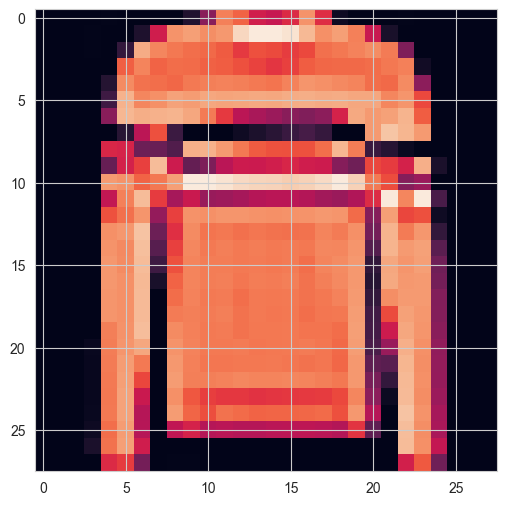

In [13]:
# Display x_train of index 5 as an image py using imshow 
plt.imshow(x_train[5])
plt.show()

In [14]:
# Checking the shape of one image for x_test
x_test[5].shape

(28, 28)

In [15]:
x_test[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 188, 181,
        189, 157, 165, 188, 176, 179, 181,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 235, 213, 213,
        223, 225, 217, 214, 204, 211, 189,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 234, 217, 211,
        217, 200, 203, 217, 203, 179, 170,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 252, 205, 209,
        219, 193, 195, 212, 207, 194, 204,  51,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 228, 184, 206,
        215, 221, 212, 209, 199, 190, 227, 105,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 244, 192, 193, 212,
        217, 210, 216, 216, 194, 175, 225, 131,   0,   0,   0,   0,   0,
          0,   0],
       [  

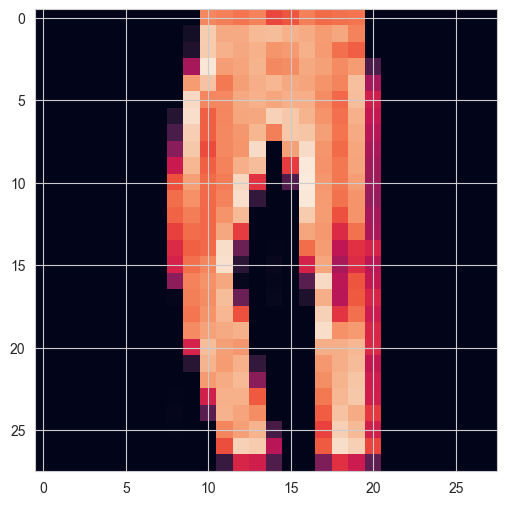

In [16]:
# Display x_test of index 5 as an image py using imshow 
plt.imshow(x_test[5])
plt.show()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [19]:
classes=["T-shirt/top",
         "Trouser",
         "Pullover",
         "Dress",
         "Coat",
         "Sandal",
         "Shirt",
         "Sneaker",
         "Bag",
         "Ankle boot"]

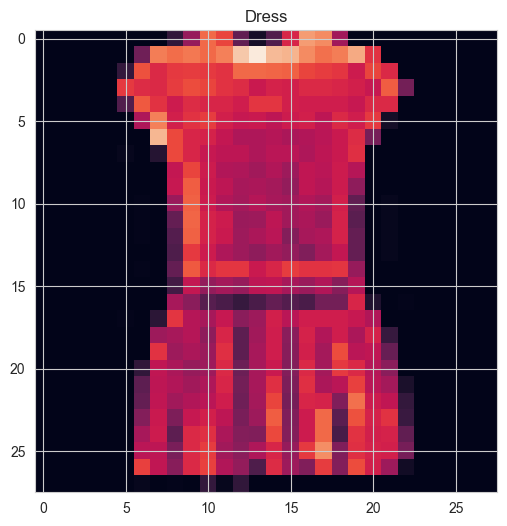

In [20]:
# Display data as an image 
plt.imshow(x_train[3])
plt.title(classes[y_train[3]])
plt.show()

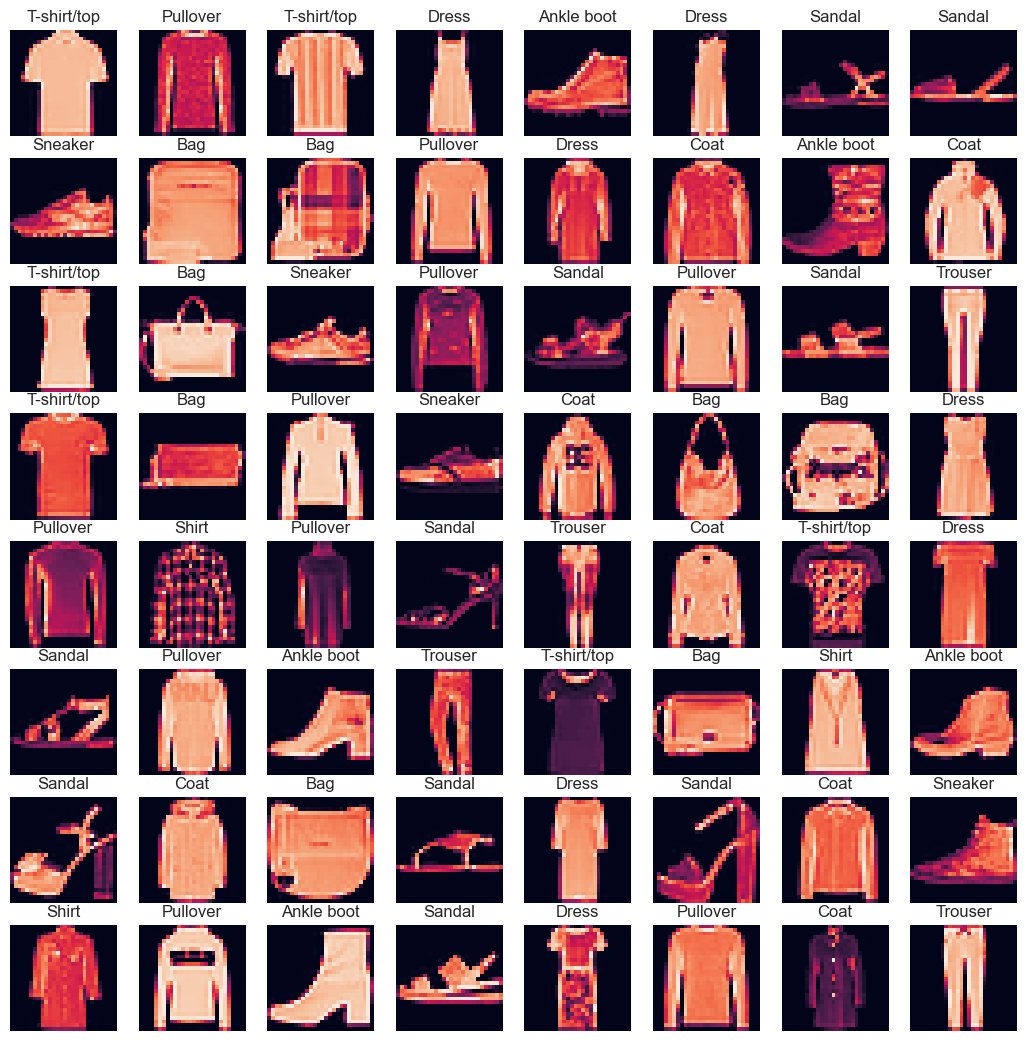

In [28]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [29]:
# Check for the lowest value
x_train[5].min()

0

In [30]:
# Check for the highest value 
x_train[5].max()

255

In [31]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [32]:
# I'll look for the lowest value after applying normalize
x_train[5].min()

0.0

In [33]:
#I'll look for the highest value after applying normalize
x_train[5].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
#here i will print all the shape for x_train,x_test,y_train,y_test
print("X_train shape is : ", x_train.shape)
print("X_test shape  is : ", x_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is : ", y_test.shape)

X_train shape is :  (60000, 28, 28)
X_test shape  is :  (10000, 28, 28)
y_train shape is :  (60000,)
y_test shape is :  (10000,)


In [34]:
#Changing the shape of an array includes a 4D transformation for x_train & x_test
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [35]:
print("X_train shape is : ", x_train.shape)
print("X_test shape  is : ", x_test.shape)

X_train shape is :  (60000, 28, 28, 1)
X_test shape  is :  (10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [37]:
#I'll use one-shot encoded  for y_train,y_test
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
y_test.shape

(10000, 10)

In [39]:
y_train.shape

(60000, 10)

In [40]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [63]:
SEED = 42
keras.utils.set_random_seed(SEED)

In [64]:
# Hher , we will use a validation set separate from the training set 
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED, shuffle=True)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
###MODEL 1

In [46]:
#Here , we will implementing convolutional neural network algorithm with keras
model_one = Sequential()# Create Model 
# Convolutional Layer with specific parameters
model_one.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model_one.add(MaxPooling2D(pool_size=(2, 2))) 

model_one.add(Flatten())

model_one.add(Dense(128, activation='relu'))
model_one.add(Dropout(0.5))
model_one.add(Dense(10, activation='softmax'))


In [47]:
# compile our model with specific parameters
model_one.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [48]:
#Print all of our model's summaries 
model_one.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
###MODEL 2

In [49]:
model_two = Sequential()# Create Model 
# Convolutional Layer with specific parameters
model_two.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu',padding='same')) 
model_two.add(MaxPooling2D(pool_size=(2, 2))) 

model_two.add(Flatten())
# Fully Connected Layers
model_two.add(Dense(128, activation='relu'))
model_two.add(Dropout(0.2))#add droupout with 0.3 
model_two.add(Dense(64, activation="relu"))# add extra hidden layers
model_two.add(Dropout(0.2))#add droupout with 0.3 
model_two.add(Dense(10, activation='softmax'))


In [50]:
# compile our model with specific parameters
model_two.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [51]:
#Print all of our model's summaries 
model_two.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5488)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               702592    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                      

In [ ]:
###MODEL 3

In [52]:
model_three = Sequential()# Create Model 
# first Convolutional Layer with specific parameters
model_three.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28, 1),activation='relu',padding='same')) 
model_three.add(BatchNormalization())#add BatchNormalization
model_three.add(MaxPooling2D(pool_size=(2, 2))) 
model_three.add(Dropout(0.5))#add droupout with 0.5

# Second Convolutional Layer with specific parameters
model_three.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1),activation='relu',padding='same'))
model_three.add(BatchNormalization())#add BatchNormalization
model_three.add(MaxPooling2D(pool_size=(2, 2)))
model_three.add(Dropout(0.5))#add droupout with 0.5

model_three.add(Flatten())
model_three.add(Dense(128, activation='relu'))
model_three.add(BatchNormalization())# add BatchNormalization
model_three.add(Dropout(0.5))#add droupout with 0.5
model_three.add(Dense(64, activation="relu"))# add extra hidden layers
model_three.add(BatchNormalization())#add BatchNormalization
model_three.add(Dropout(0.5))#add droupout with 0.5 
model_three.add(Dense(10, activation='softmax'))##output


In [53]:
# compile our model with specific parameters
model_three.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [54]:
#Print all of our model's summaries 
model_three.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [139]:
#Create an early Stopping point that we will monitor using val_loss with mode min
early_stop = EarlyStopping(monitor='val_loss',mode="min",patience=4 ,restore_best_weights = True)


In [140]:
#Fit The first model
model_one.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop],
)


Epoch 1/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3051 - accuracy: 0.8947 - val_loss: 0.2713 - val_accuracy: 0.9052
Epoch 2/50
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3029 - accuracy: 0.8963 - val_loss: 0.2883 - val_accuracy: 0.8934
Epoch 3/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2940 - accuracy: 0.8975 - val_loss: 0.2833 - val_accuracy: 0.9003
Epoch 4/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2922 - accuracy: 0.9000 - val_loss: 0.2880 - val_accuracy: 0.9017
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2838 - accuracy: 0.9030 - val_loss: 0.2759 - val_accuracy: 0.9064


In [141]:
#Fit the secound model
model_two.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop],
)

Epoch 1/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2698 - accuracy: 0.9062 - val_loss: 0.2964 - val_accuracy: 0.8930
Epoch 2/50
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2590 - accuracy: 0.9107 - val_loss: 0.2939 - val_accuracy: 0.8938
Epoch 3/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2544 - accuracy: 0.9129 - val_loss: 0.2851 - val_accuracy: 0.9046
Epoch 4/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2519 - accuracy: 0.9145 - val_loss: 0.2934 - val_accuracy: 0.9043
Epoch 5/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2471 - accuracy: 0.9153 - val_loss: 0.2891 - val_accuracy: 0.9088
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2459 - accuracy: 0.9162 - val_loss: 0.2984 - val_accuracy: 0.9061
Epoch 7/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2409 - accuracy: 0.9191 - val_loss: 0.2831 -

In [142]:
#Fit the third model
model_three.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop],
)

Epoch 1/50
1500/1500 [==============================] - 53s 35ms/step - loss: 0.4471 - accuracy: 0.8503 - val_loss: 0.3121 - val_accuracy: 0.8895
Epoch 2/50
1500/1500 [==============================] - 54s 36ms/step - loss: 0.4137 - accuracy: 0.8604 - val_loss: 0.3360 - val_accuracy: 0.8714
Epoch 3/50
1500/1500 [==============================] - 58s 39ms/step - loss: 0.4003 - accuracy: 0.8652 - val_loss: 0.2832 - val_accuracy: 0.9007
Epoch 4/50
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3936 - accuracy: 0.8700 - val_loss: 0.2842 - val_accuracy: 0.9007
Epoch 5/50
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3798 - accuracy: 0.8744 - val_loss: 0.3092 - val_accuracy: 0.8849
Epoch 6/50
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3728 - accuracy: 0.8771 - val_loss: 0.3442 - val_accuracy: 0.8708
Epoch 7/50
1500/1500 [==============================] - 61s 40ms/step - loss: 0.3671 - accuracy: 0.8773 - val_loss: 0.2652 -

**TASK 7: Plot values of metrics you used in your model.**

In [143]:
conc = pd.DataFrame(model_one.history.history)
conc.head()

,loss,accuracy,val_loss,val_accuracy
0,0.305,0.895,0.271,0.905
1,0.303,0.896,0.288,0.893
2,0.294,0.898,0.283,0.900
3,0.292,0.900,0.288,0.902
4,0.284,0.903,0.276,0.906


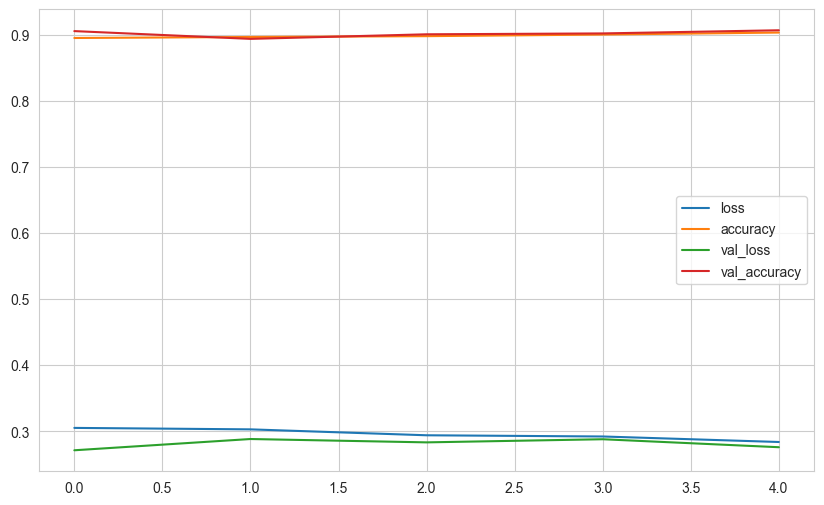

In [144]:
# Plot our model based on loss and val loss and accuracy and val accuracy
conc.plot()
plt.show()

In [145]:
loss_d = pd.DataFrame(model_two.history.history)
loss_d.head()

,loss,accuracy,val_loss,val_accuracy
0,0.270,0.906,0.296,0.893
1,0.259,0.911,0.294,0.894
2,0.254,0.913,0.285,0.905
3,0.252,0.914,0.293,0.904
4,0.247,0.915,0.289,0.909


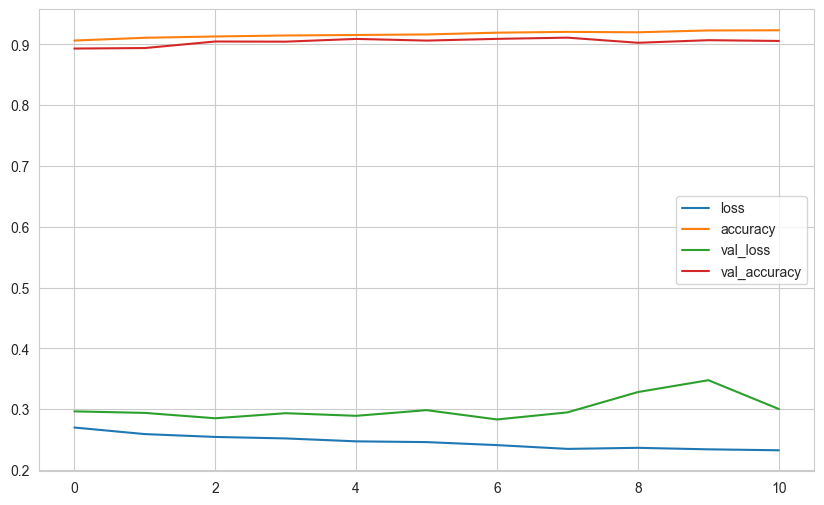

In [146]:
# Plot our model based on loss and val loss and accuracy and val accuracy
loss_d.plot()
plt.show()

In [147]:
loss_df = pd.DataFrame(model_three.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.447,0.850,0.312,0.890
1,0.414,0.860,0.336,0.871
2,0.400,0.865,0.283,0.901
3,0.394,0.870,0.284,0.901
4,0.380,0.874,0.309,0.885


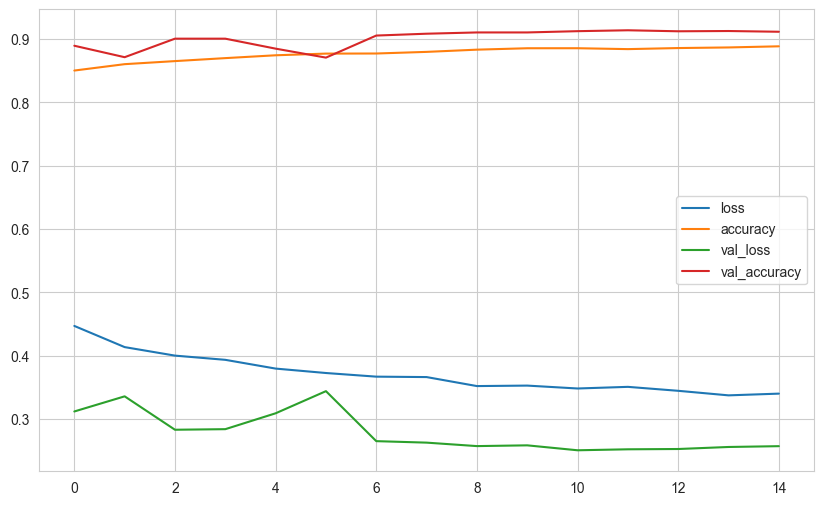

In [148]:
# Plot our model based on loss and val loss and accuracy and val accuracy
loss_df.plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [149]:
model_one.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2921 - accuracy: 0.8966


[0.29210054874420166, 0.8966000080108643]

In [150]:
score = model_one.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29210054874420166
Test accuracy: 0.8966000080108643


In [151]:
pred_prob_one = model_one.predict(x_test)
pred_prob_one

313/313 [==============================] - 1s 2ms/step


array([[9.3324132e-08, 2.2983573e-09, 7.4385476e-08, ..., 8.5470569e-04,
        2.3926916e-05, 9.9906403e-01],
       [1.9868567e-06, 5.0879158e-13, 9.9997330e-01, ..., 4.6376545e-14,
        2.0047074e-10, 5.2258474e-13],
       [5.8129796e-08, 9.9999988e-01, 6.5187543e-11, ..., 5.2506959e-09,
        3.5781302e-09, 4.3077814e-10],
       ...,
       [3.3543395e-07, 4.5088709e-14, 6.6449499e-09, ..., 2.1526099e-09,
        9.9999809e-01, 1.5120555e-10],
       [9.7536657e-10, 9.9999928e-01, 1.4755844e-12, ..., 5.0970506e-10,
        4.2727638e-10, 1.0123016e-09],
       [2.4760826e-03, 3.8985113e-04, 4.8564258e-03, ..., 2.4930826e-01,
        6.1238240e-02, 2.9861037e-02]], dtype=float32)

In [152]:
y_pred_one = np.argmax(pred_prob_one, axis=1)

In [153]:
y_pred_one

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [154]:
# predict 
pred = model_one.predict(x_test, batch_size = 32)
pred = np.argmax(pred_prob_one, axis=1)
# label
y_testo = np.argmax(y_test, axis=1)

print(y_testo.shape, pred.shape)
print(y_testo[:5], pred[:5])

313/313 [==============================] - 1s 2ms/step
(10000,) (10000,)
[9 2 1 1 6] [9 2 1 1 6]


In [155]:
print(classification_report(y_testo, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.78      0.83      1000
           3       0.86      0.93      0.90      1000
           4       0.80      0.87      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.72      0.71      0.72      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



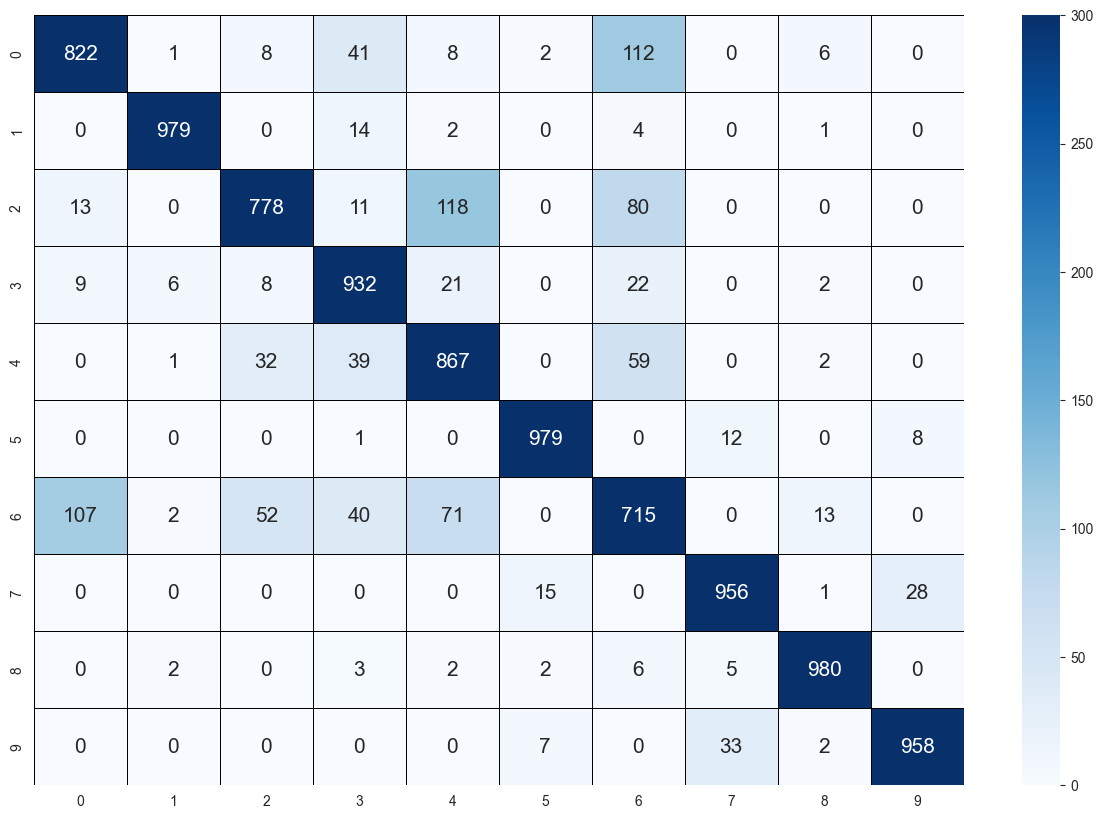

In [156]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_testo, pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [119]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [106]:
###Model 2

In [157]:
model_two.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.9033


[0.30344951152801514, 0.9032999873161316]

In [158]:
scor = model_two.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scor[0])
print("Test accuracy:", scor[1])

Test loss: 0.30344951152801514
Test accuracy: 0.9032999873161316


In [159]:
pred_prob_two = model_two.predict(x_test)
pred_prob_two

313/313 [==============================] - 1s 2ms/step


array([[1.32781783e-14, 1.41709235e-12, 1.12744896e-13, ...,
        1.73138287e-05, 1.98617900e-10, 9.99982357e-01],
       [4.23567093e-09, 7.76910057e-25, 1.00000000e+00, ...,
        9.51867543e-19, 1.29293697e-22, 1.33485981e-22],
       [1.95826012e-11, 1.00000000e+00, 3.68125669e-13, ...,
        7.90667648e-14, 2.24751773e-14, 1.14057852e-13],
       ...,
       [1.49255573e-11, 4.90667262e-21, 5.87141894e-14, ...,
        3.01023143e-14, 1.00000000e+00, 2.36999260e-18],
       [1.52644231e-14, 1.00000000e+00, 2.34139203e-16, ...,
        3.45962719e-16, 4.82626436e-17, 2.85783563e-14],
       [1.05632795e-03, 3.92192800e-04, 2.03809337e-04, ...,
        6.21146679e-01, 1.55502185e-02, 6.14499077e-02]], dtype=float32)

In [160]:
# predict 
predtwo = model_two.predict(x_test, batch_size = 32)
predtwo = np.argmax(pred_prob_two, axis=1)
# label
y_testo = np.argmax(y_test, axis=1)

print(y_testo.shape, predtwo.shape)
print(y_testo[:5], predtwo[:5])

313/313 [==============================] - 1s 3ms/step
(10000,) (10000,)
[9 2 1 1 6] [9 2 1 1 6]


In [161]:
print(classification_report(y_testo, predtwo))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.85      1000
           3       0.88      0.93      0.90      1000
           4       0.84      0.82      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.78      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



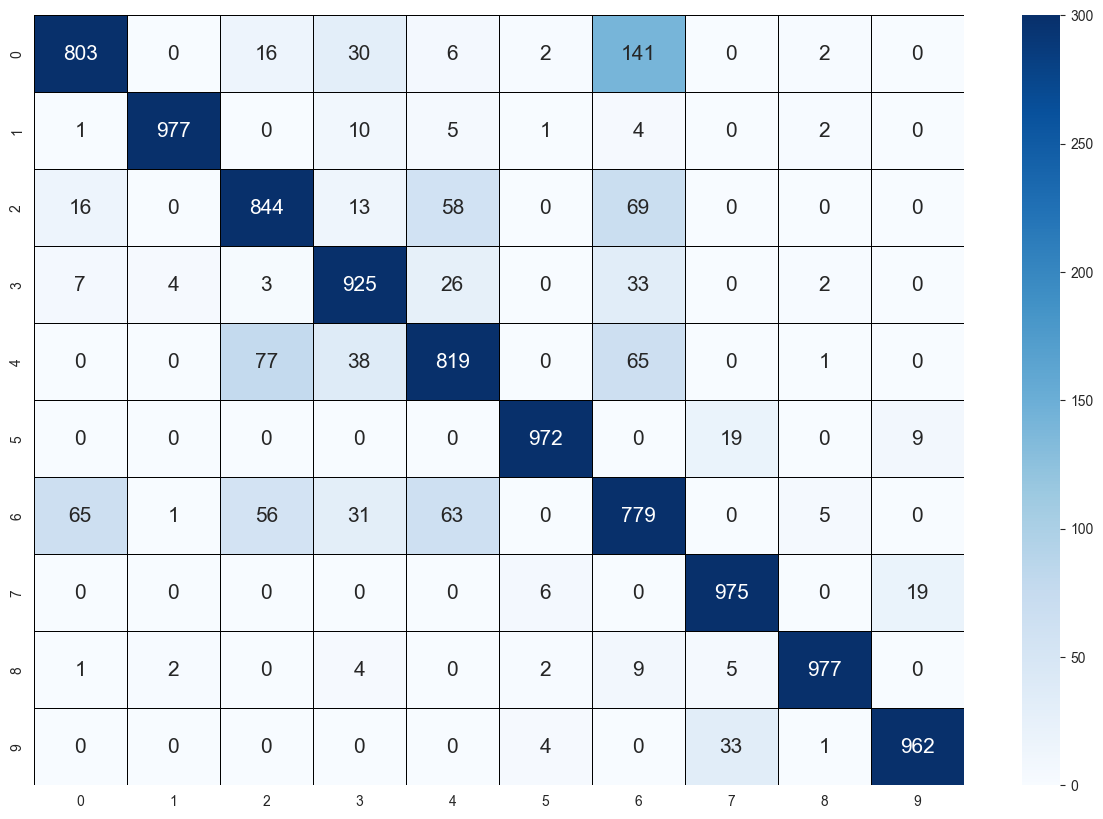

In [162]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_testo, predtwo),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [118]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [109]:
###Model 3 

In [163]:
model_three.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2666 - accuracy: 0.9063


[0.2665909230709076, 0.9063000082969666]

In [164]:
sco = model_three.evaluate(x_test, y_test, verbose=0)
print("Test loss:", sco[0])
print("Test accuracy:", sco[1])

Test loss: 0.2665909230709076
Test accuracy: 0.9063000082969666


In [165]:
pred_prob_thr = model_three.predict(x_test)
pred_prob_thr

313/313 [==============================] - 3s 10ms/step


array([[8.2502970e-07, 2.2038614e-06, 4.7010479e-07, ..., 9.7505999e-04,
        2.2535223e-06, 9.9895573e-01],
       [2.4371393e-04, 9.6154167e-07, 9.9612683e-01, ..., 1.0718102e-06,
        2.3302366e-06, 1.5518400e-06],
       [1.6303842e-07, 9.9999917e-01, 5.8348586e-08, ..., 6.0530297e-08,
        5.4968165e-08, 8.0578289e-08],
       ...,
       [1.1826116e-05, 2.5270148e-07, 7.6712713e-06, ..., 5.1927955e-06,
        9.9990869e-01, 6.2147196e-06],
       [5.6126996e-08, 9.9999928e-01, 2.3348488e-08, ..., 3.2836084e-08,
        4.1853493e-08, 3.4446462e-08],
       [6.2066101e-04, 2.5875887e-04, 2.1786627e-03, ..., 4.4553107e-01,
        3.2268160e-03, 8.8326400e-03]], dtype=float32)

In [166]:
# predict 
predtth = model_three.predict(x_test, batch_size = 32)
predtth = np.argmax(pred_prob_thr, axis=1)
# label
y_tes = np.argmax(y_test, axis=1)

print(y_tes.shape, predtth.shape)
print(y_tes[:5], predtth[:5])

313/313 [==============================] - 3s 9ms/step
(10000,) (10000,)
[9 2 1 1 6] [9 2 1 1 6]


In [167]:
print(classification_report(y_tes, predtth))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.88      0.93      0.90      1000
           4       0.85      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.64      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



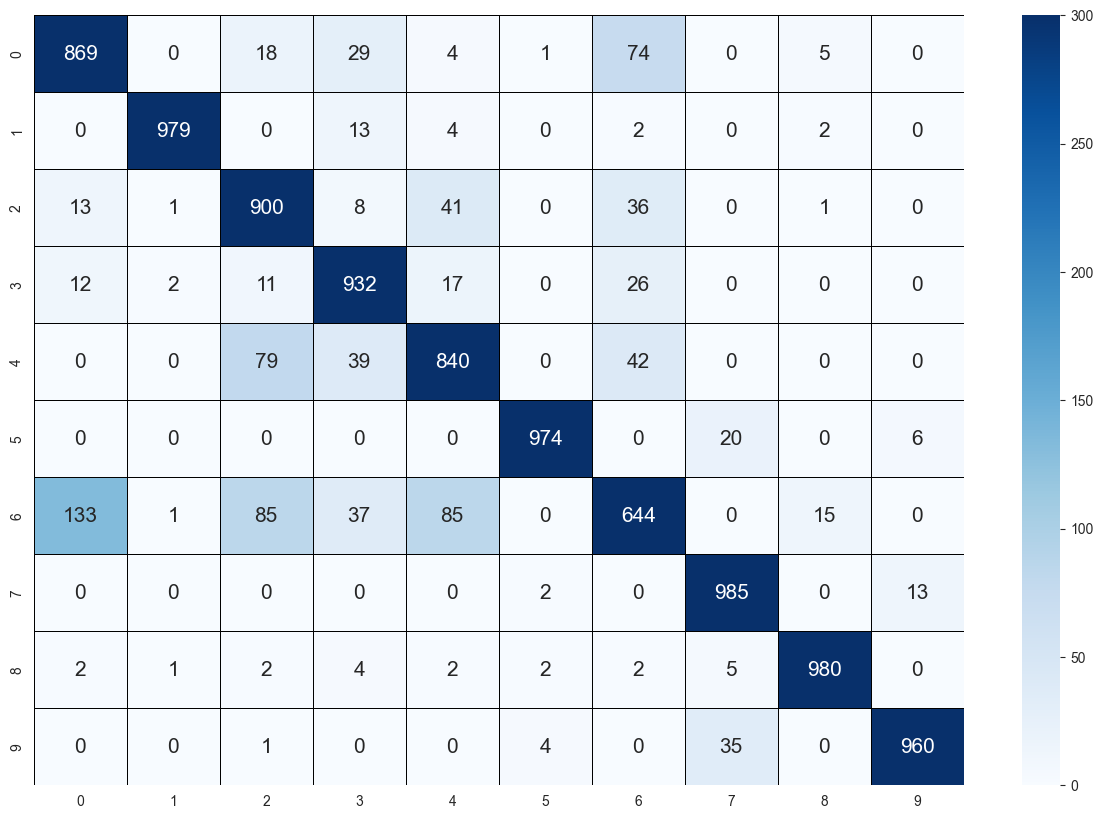

In [168]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_tes, predtth),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [112]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Prediction

### So, after investigating all of the models, we conclude that the model 3 is the best one.

##Now we will attempt predictions using our best model. 

In [129]:
my_image = x_test[22]

In [130]:
my_image.shape

(28, 28, 1)

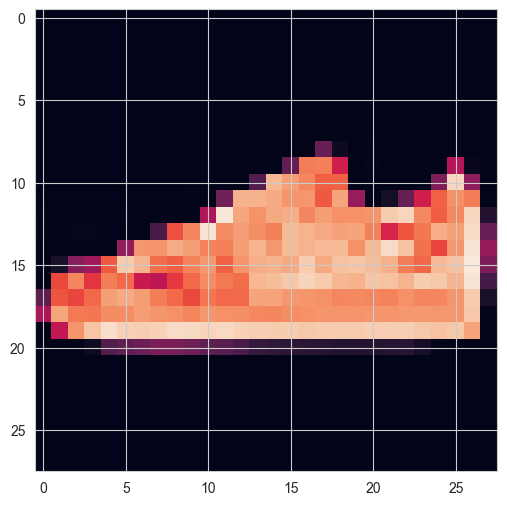

In [131]:
plt.imshow(my_image)
plt.show()

In [169]:
image_prediction = model_three.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 25ms/step


In [170]:
image_prediction

array([[4.3489652e-07, 1.4886893e-06, 3.9036513e-07, 9.4686419e-07,
        5.0743995e-07, 8.7089917e-05, 4.6201345e-07, 9.9927205e-01,
        2.9837101e-06, 6.3358928e-04]], dtype=float32)

In [171]:
np.argmax(image_prediction, axis=1)

array([7], dtype=int64)

In [172]:
final = np.argmax(image_prediction, axis=1)

## As a result, our model predicts the index 7 

In [173]:
final

array([7], dtype=int64)

In [174]:
classes[int(final)]

'Sneaker'

# So, when we look for index 7 in the target class, we obtain the same result.

In [138]:
classes[7]

'Sneaker'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___